# Task 2 - Data Science and Data Analytics using Python!

#### import needed libs

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

#### read the titanic dataset

In [4]:
df = pd.read_csv("tested.csv", sep=",")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.shape

(418, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### handle null values
- fillna is method which is used to fill missing values (NaN) in a column
- the median of age column is filled in the empty values
- the median is not affected by any outliers because it's just a middle number whereas mean can be easily affected by outliers


In [8]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [9]:
df["Age"].isnull().sum()

np.int64(0)

In [10]:
df.drop(columns=["Cabin"], inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

#### 3.1 Who survived more: Male or Female?

In [12]:
winner = df.groupby('Sex')['Survived'].mean().idxmax()
print(f"{winner} survived more")

female survived more


Bar chart of survival by gender

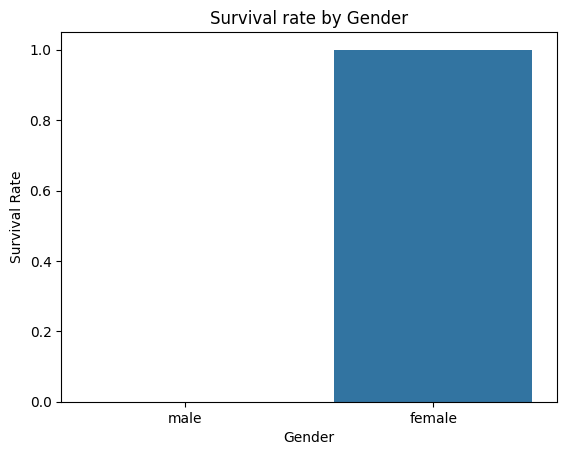

In [13]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()

#### 3.2 Did passenger class affect survival chances?

In [14]:
class_survival = df.groupby('Pclass')['Survived'].mean()
class_survival

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

Bar chart of survival by class

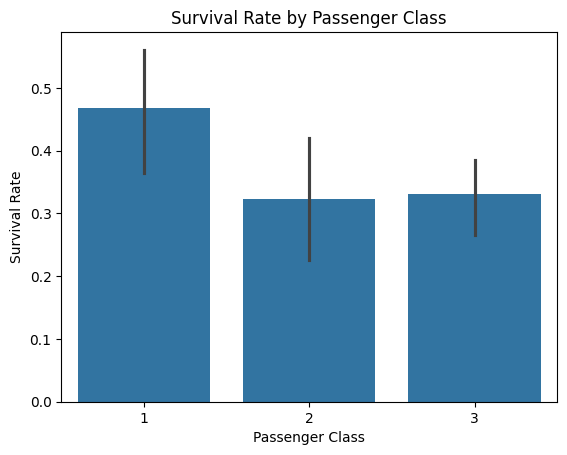

In [15]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

#### 3.3 What was the survival rate by age group?
- assumptions 0-12 as child, 12-18 as teen and so on
- cut() -> splits numbers into ranges (bins)
- It takes the age column and converts each age into an age group (like “Child”, “Adult”, “Senior”)


In [16]:
age_grp = [0, 12, 18, 35, 65, 100]
labels = ["Child", "Teen", "Young Adult", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(df['Age'], bins=age_grp, labels=labels)

In [17]:
agegrp_survival = df.groupby("AgeGroup", observed=False)["Survived"].mean()
agegrp_survival

AgeGroup
Child          0.480000
Teen           0.413793
Young Adult    0.335907
Adult          0.388350
Senior         0.500000
Name: Survived, dtype: float64

histogram of passenger ages

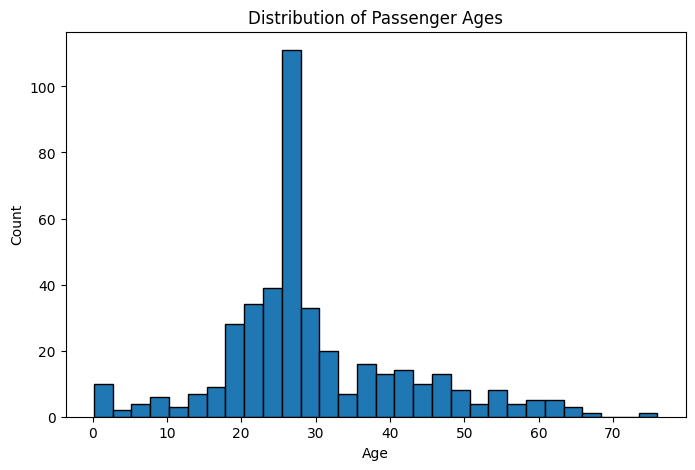

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=30, edgecolor="black")
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()